In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

import seaborn as sns

import plotly.express as px

In [30]:
ccc_data = pd.read_csv(r'Credit Card Customer Data.csv')

In [31]:
ccc_data


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [32]:
ccc_data.describe()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [33]:
ccc_data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

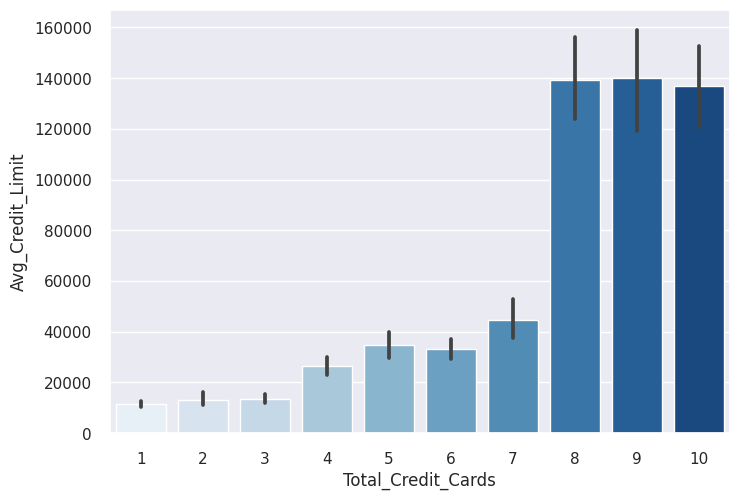

In [34]:
sns.set(style = "darkgrid")
sns.barplot(data = ccc_data,x = ccc_data["Total_Credit_Cards"], y = ccc_data["Avg_Credit_Limit"], palette = "Blues")
plt.show()

In [35]:
ccc_data.groupby(['Total_Credit_Cards'])['Customer Key'].count()

Total_Credit_Cards
1      59
2      64
3      53
4     151
5      74
6     117
7     101
8      11
9      11
10     19
Name: Customer Key, dtype: int64

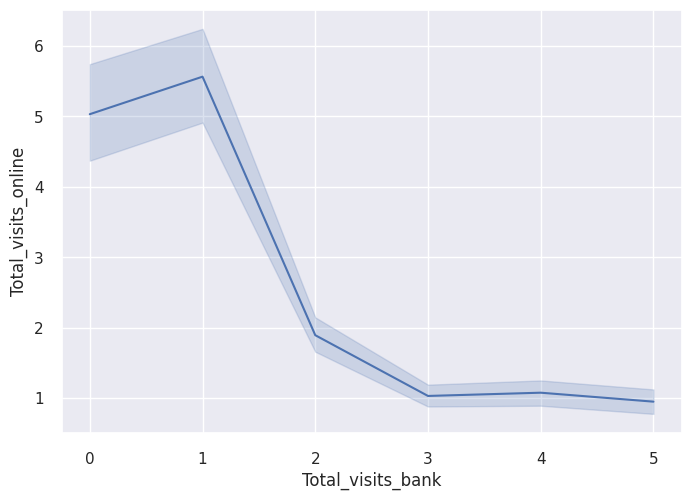

In [36]:
sns.lineplot(ccc_data,x=ccc_data['Total_visits_bank'],y = ccc_data['Total_visits_online'])
plt.show()

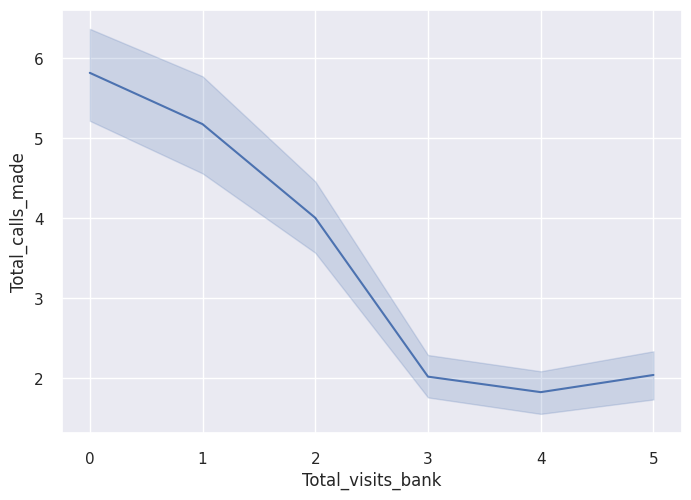

In [37]:
sns.lineplot(ccc_data,x=ccc_data['Total_visits_bank'],y = ccc_data['Total_calls_made'])
plt.show()

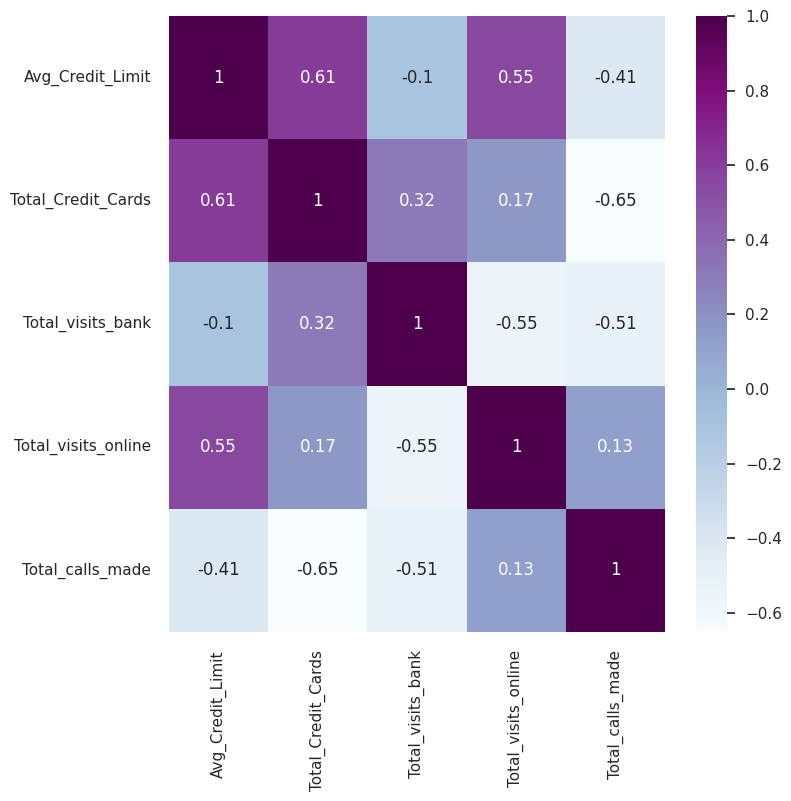

In [38]:
X = ccc_data.drop(['Sl_No', 'Customer Key'], axis=1).copy()
plt.figure(figsize = (8,8))
sns.heatmap(X.corr(),annot = True, cmap='BuPu')
plt.show()

In [39]:
X.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


In [40]:
col = X.columns
col


Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
X[col] = scaler.fit_transform(X[col])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(X,test_size = 0.50,random_state=42)
X_val, X_test = train_test_split(X_val, test_size = 0.50, random_state=42)

In [43]:
print('shape of training dataset is {}'.format(X_train.shape[0]))
print('shape of validation dataset is {}'.format(X_val.shape[0]))
print('shape of test dataset is {}'.format(X_test.shape[0]))

shape of training dataset is 330
shape of validation dataset is 165
shape of test dataset is 165


In [44]:
from sklearn.cluster import KMeans
#lest start with randomly choosing K = 5
k = 5
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(ccc_data)
y_pred

/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 3, 2, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0,

In [45]:
kmeans.inertia_

228025696595.90054

In [46]:
y_pred

array([4, 3, 3, 2, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0,

/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


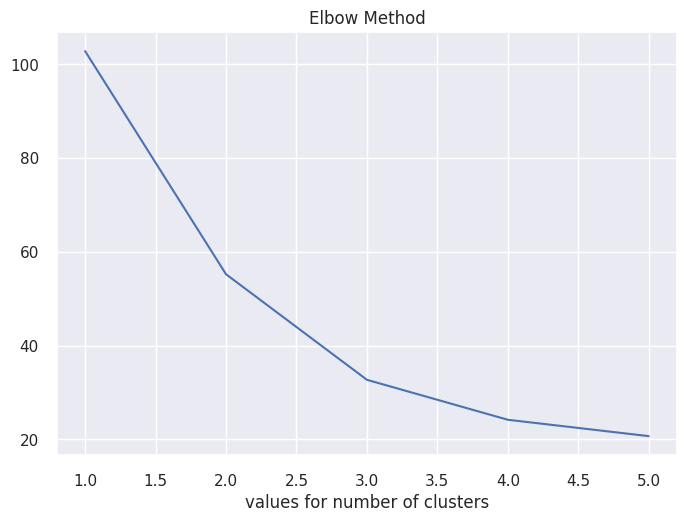

In [47]:
inertias = []
i_range = []
for i in range (1, 6):
    kmeans = KMeans(n_clusters=i, random_state = 42).fit(X_train)
    inertias.append(kmeans.inertia_)
    i_range.append(i)
p = sns.lineplot(x=i_range,y=inertias)
p.set_xlabel("values for number of clusters")
p.set_ylabel = ("values for inertia")
p.set_title('Elbow Method')
plt.show()

/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


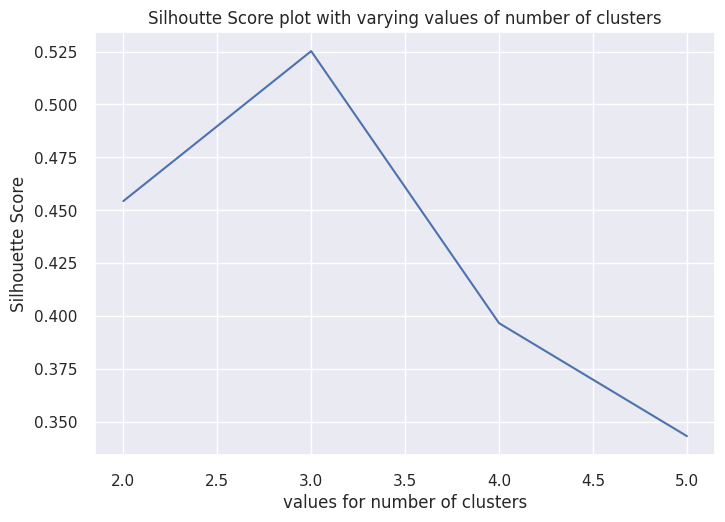

In [48]:
from sklearn.metrics import silhouette_score

sil_score = []
i_range = []
for i in range (2,6):
    kmeans = KMeans(n_clusters=i, random_state = 42).fit(X_train)
    t = silhouette_score(X_train, kmeans.labels_)
    sil_score.append(t)
    i_range.append(i)
p = sns.lineplot(x = i_range, y = sil_score)
p.set_xlabel("values for number of clusters")
p.set_ylabel("Silhouette Score")
p.set_title("Silhoutte Score plot with varying values of number of clusters")
plt.show()

/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


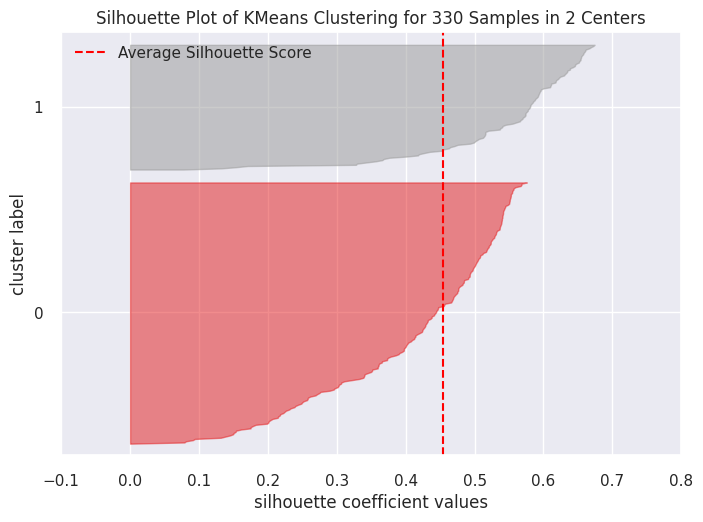

/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


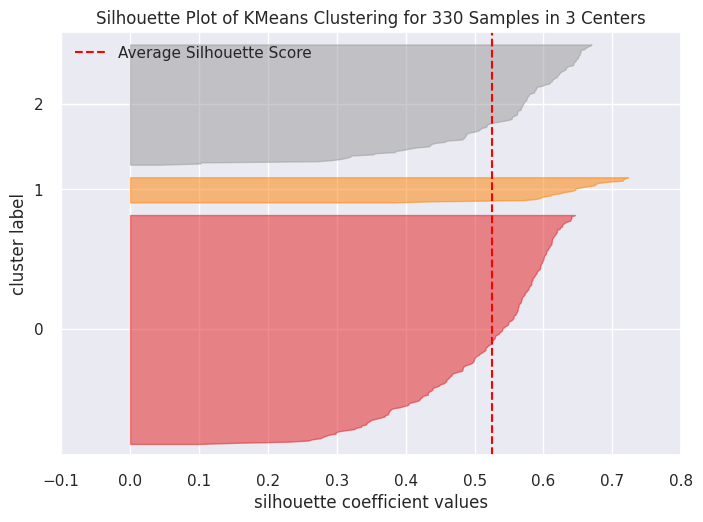

/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


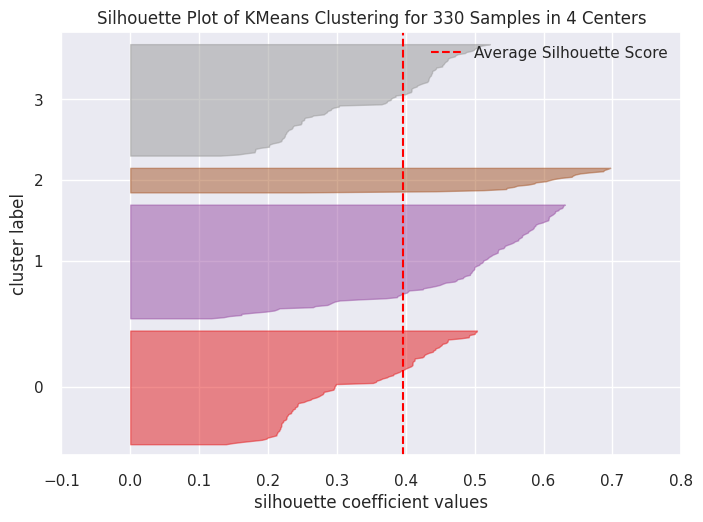

/home/i_m_of_no_one_/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


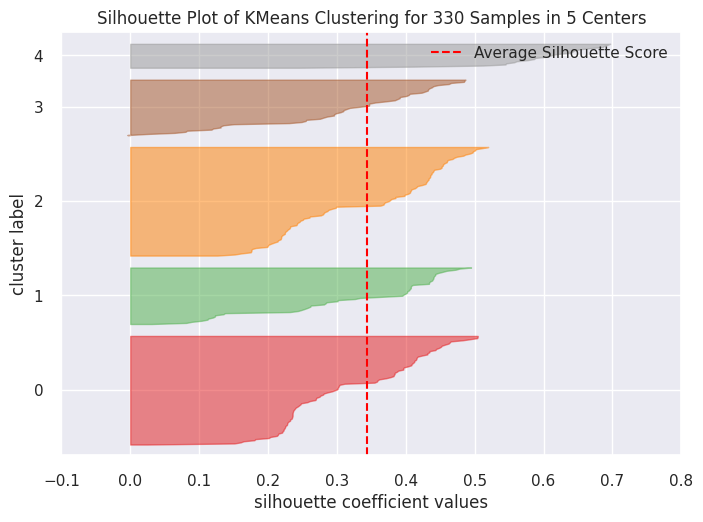

In [49]:
from yellowbrick.cluster import SilhouetteVisualizer 
#fig, axes = plt.subplots(2,2)
for i in range (2,6):
    kmeans = KMeans(n_clusters = i, random_state=42)
    viz = SilhouetteVisualizer(kmeans)
    viz.fit(X_train)
    viz.poof()